<a href="https://colab.research.google.com/github/Lexx2023/myfirstproject/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving img002_copy.jpg to img002_copy (3).jpg

(32, 32, 3)

(32, 32, 3)
(1, 32, 32, 3)
Epoch 1/15
704/704 [==============================] - 56s 78ms/step - loss: 1.6569 - accuracy: 0.3898 - val_loss: 1.3521 - val_accuracy: 0.5222
Epoch 2/15
704/704 [==============================] - 53s 75ms/step - loss: 1.2947 - accuracy: 0.5376 - val_loss: 1.1963 - val_accuracy: 0.5766
Epoch 3/15
704/704 [==============================] - 56s 79ms/step - loss: 1.1710 - accuracy: 0.5836 - val_loss: 1.1501 - val_accuracy: 0.5832
Epoch 4/15
704/704 [==============================] - 55s 78ms/step - loss: 1.0717 - accuracy: 0.6231 - val_loss: 1.0472 - val_accuracy: 0.6296
Epoch 5/15
704/704 [==============================] - 54s 77ms/step - loss: 0.9972 - accuracy: 0.6495 - val_loss: 1.0805 - val_accuracy: 0.6218
Epoch 6/15
704/704 [==============================] - 54s 77ms/step - loss: 0.9381 - accuracy: 0.6701 - val_loss: 0.9803 - val_accuracy: 0.6624
Epoch 7/15
704/704 [=============================

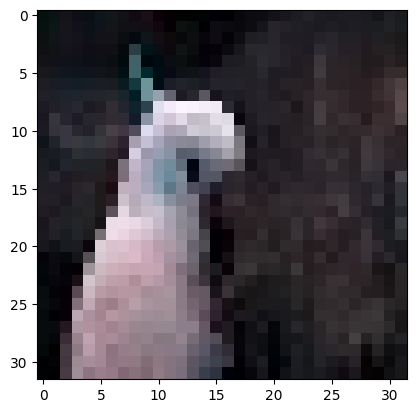

In [9]:
from io import BytesIO
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from google.colab import files
from PIL import Image, ImageDraw
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Шаг 1: Загрузка данных
# 1.1. Загрузка данных CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# 1.2. Подготовка данных
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Шаг 2: Создание сверточной нейронной сети
# 2.1. Импорт библиотек
model = models.Sequential()

uploaded = files.upload()

#img=Image.open(BytesIO(uploaded['img002_copy.jpg']))
img = Image.open('img002_copy.jpg')
img1 = cv2.imread('img002_copy.jpg')
print()
print(img1.shape)
print()
plt.imshow(img1)
x = np.array(img1)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
# 2.2. Создание сверточной нейронной сети
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Шаг 3: Обучение сверточной нейронной сети
# 3.1. Настройка параметров обучения
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 3.2. Обучение модели
model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.1)

# Шаг 4: Оценка производительности модели
# 4.1. Оценка на тестовых данных
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Точность на тестовых данных:", test_acc)
res = model.predict(x)
print(np.argmax(res))
